In [ ]:
#Name = Sakariya Abuukar
#Student Number: 4300437

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from google.colab import files

In [3]:
import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import metrics



In [4]:
uploaded = files.upload()

Saving CW_Dataset_4300437.csv to CW_Dataset_4300437.csv


In [ ]:
CW_Dataset = pd.read_csv("CW_Dataset_4300437.csv")
CW_Dataset.head()

,Melt temperature,Mold temperature,time_to_fill,ZDx - Plasticizing time,ZUx - Cycle time,SKx - Closing force,SKs - Clamping force peak value,Ms - Torque peak value current cycle,Mm - Torque mean value current cycle,APSs - Specific back pressure peak value,APVs - Specific injection pressure peak value,CPn - Screw position at the end of hold pressure,SVo - Shot volume,quality
0,105.833,81.009,6.240,3.49,75.73,891.800000,914.7,110.3,101.4,145.8,862.4,8.68,18.89,3.0
1,105.907,81.119,6.240,3.31,75.70,892.600000,913.4,122.3,106.1,147.3,881.8,8.76,18.81,3.0
2,105.449,81.437,6.864,3.22,74.83,884.915853,918.2,120.5,93.1,148.1,920.2,8.68,18.76,1.0
3,106.258,81.149,6.864,3.17,74.83,909.000000,925.8,116.0,106.5,145.9,923.1,8.87,18.70,1.0
4,106.105,81.468,6.084,2.84,75.63,906.000000,919.7,119.9,107.6,145.6,917.0,8.97,18.60,4.0


In [ ]:
CW_Dataset.drop(CW_Dataset.columns[0], axis=1)

,ZDx - Plasticizing time,ZUx - Cycle time,SKx - Closing force,SKs - Clamping force peak value,Ms - Torque peak value current cycle,Mm - Torque mean value current cycle,APSs - Specific back pressure peak value,APVs - Specific injection pressure peak value,Screw position at the end of hold pressure,Shot volume,quality
0,3.49,75.73,891.800000,914.700000,110.3,101.4,145.8,862.4,8.68,18.89,3.0
1,3.31,75.70,892.600000,913.400000,122.3,106.1,147.3,881.8,8.76,18.81,3.0
2,3.22,74.83,884.915853,918.200000,120.5,93.1,148.1,920.2,8.68,18.76,1.0
3,3.17,74.83,909.000000,925.800000,116.0,106.5,145.9,923.1,8.87,18.70,1.0
4,2.84,75.63,906.000000,919.700000,119.9,107.6,145.6,917.0,8.97,18.60,4.0
...,...,...,...,...,...,...,...,...,...,...,...
995,2.87,75.64,900.100000,916.900000,118.7,108.4,146.5,906.6,8.91,18.66,4.0
996,3.24,74.81,914.000000,933.400000,115.4,103.3,146.3,915.1,8.79,18.78,2.0
997,4.08,74.81,881.123102,902.634128,116.9,107.3,148.1,923.9,8.82,18.73,1.0
998,3.31,75.74,894.200000,914.700000,119.6,105.4,146.2,892.8,8.76,18.81,3.0


In [ ]:
CW_Dataset.rename(columns={'CPn - Screw position at the end of hold pressure':' Screw position at the end of hold pressure' , 'SVo - Shot volume':'Shot volume'},inplace=True)
CW_Dataset.head()

,Melt temperature,Mold temperature,time_to_fill,ZDx - Plasticizing time,ZUx - Cycle time,SKx - Closing force,SKs - Clamping force peak value,Ms - Torque peak value current cycle,Mm - Torque mean value current cycle,APSs - Specific back pressure peak value,APVs - Specific injection pressure peak value,Screw position at the end of hold pressure,Shot volume,quality
0,105.833,81.009,6.240,3.49,75.73,891.800000,914.7,110.3,101.4,145.8,862.4,8.68,18.89,3.0
1,105.907,81.119,6.240,3.31,75.70,892.600000,913.4,122.3,106.1,147.3,881.8,8.76,18.81,3.0
2,105.449,81.437,6.864,3.22,74.83,884.915853,918.2,120.5,93.1,148.1,920.2,8.68,18.76,1.0
3,106.258,81.149,6.864,3.17,74.83,909.000000,925.8,116.0,106.5,145.9,923.1,8.87,18.70,1.0
4,106.105,81.468,6.084,2.84,75.63,906.000000,919.7,119.9,107.6,145.6,917.0,8.97,18.60,4.0


In [ ]:
CW_Dataset['Moulding_injection_volume'] = CW_Dataset[' Screw position at the end of hold pressure'] * CW_Dataset['Shot volume']
CW_Dataset.head()

,Melt temperature,Mold temperature,time_to_fill,ZDx - Plasticizing time,ZUx - Cycle time,SKx - Closing force,SKs - Clamping force peak value,Ms - Torque peak value current cycle,Mm - Torque mean value current cycle,APSs - Specific back pressure peak value,APVs - Specific injection pressure peak value,Screw position at the end of hold pressure,Shot volume,quality,Moulding_injection_volume
0,105.833,81.009,6.240,3.49,75.73,891.800000,914.7,110.3,101.4,145.8,862.4,8.68,18.89,3.0,163.9652
1,105.907,81.119,6.240,3.31,75.70,892.600000,913.4,122.3,106.1,147.3,881.8,8.76,18.81,3.0,164.7756
2,105.449,81.437,6.864,3.22,74.83,884.915853,918.2,120.5,93.1,148.1,920.2,8.68,18.76,1.0,162.8368
3,106.258,81.149,6.864,3.17,74.83,909.000000,925.8,116.0,106.5,145.9,923.1,8.87,18.70,1.0,165.8690
4,106.105,81.468,6.084,2.84,75.63,906.000000,919.7,119.9,107.6,145.6,917.0,8.97,18.60,4.0,166.8420


In [ ]:
CW_Dataset['Moulding_injection_process'] = pd.cut(CW_Dataset[' Screw position at the end of hold pressure'], bins = [8.6,8.7,8.8,8.9], labels = ['Low', 'Meduim','High'])
CW_Dataset.head()

,Melt temperature,Mold temperature,time_to_fill,ZDx - Plasticizing time,ZUx - Cycle time,SKx - Closing force,SKs - Clamping force peak value,Ms - Torque peak value current cycle,Mm - Torque mean value current cycle,APSs - Specific back pressure peak value,APVs - Specific injection pressure peak value,Screw position at the end of hold pressure,Shot volume,quality,Moulding_injection_volume,Moulding_injection_process
0,105.833,81.009,6.240,3.49,75.73,891.800000,914.7,110.3,101.4,145.8,862.4,8.68,18.89,3.0,163.9652,Low
1,105.907,81.119,6.240,3.31,75.70,892.600000,913.4,122.3,106.1,147.3,881.8,8.76,18.81,3.0,164.7756,Meduim
2,105.449,81.437,6.864,3.22,74.83,884.915853,918.2,120.5,93.1,148.1,920.2,8.68,18.76,1.0,162.8368,Low
3,106.258,81.149,6.864,3.17,74.83,909.000000,925.8,116.0,106.5,145.9,923.1,8.87,18.70,1.0,165.8690,High
4,106.105,81.468,6.084,2.84,75.63,906.000000,919.7,119.9,107.6,145.6,917.0,8.97,18.60,4.0,166.8420,NaN


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
CW_Dataset[['Screw position at the end of hold pressure', 'Shot volume']] = scaler.fit_transform(
    CW_Dataset[[' Screw position at the end of hold pressure', 'Shot volume']]
)
CW_Dataset.head()

,Melt temperature,Mold temperature,time_to_fill,ZDx - Plasticizing time,ZUx - Cycle time,SKx - Closing force,SKs - Clamping force peak value,Ms - Torque peak value current cycle,Mm - Torque mean value current cycle,APSs - Specific back pressure peak value,APVs - Specific injection pressure peak value,Screw position at the end of hold pressure,Shot volume,quality,Screw position at the end of hold pressure,Moulding_injection_process
0,105.833,81.009,6.240,3.49,75.73,891.800000,914.7,110.3,101.4,145.8,862.4,-1.250661,1.367202,3.0,-1.250661,NaN
1,105.907,81.119,6.240,3.31,75.70,892.600000,913.4,122.3,106.1,147.3,881.8,-0.457157,0.545628,3.0,-0.457157,NaN
2,105.449,81.437,6.864,3.22,74.83,884.915853,918.2,120.5,93.1,148.1,920.2,-1.250661,0.032144,1.0,-1.250661,NaN
3,106.258,81.149,6.864,3.17,74.83,909.000000,925.8,116.0,106.5,145.9,923.1,0.633910,-0.584037,1.0,0.633910,NaN
4,106.105,81.468,6.084,2.84,75.63,906.000000,919.7,119.9,107.6,145.6,917.0,1.625790,-1.611004,4.0,1.625790,NaN


In [ ]:
CW_Dataset.isnull().sum()

,0
Melt temperature,0
Mold temperature,0
time_to_fill,0
ZDx - Plasticizing time,0
ZUx - Cycle time,0
SKx - Closing force,0
SKs - Clamping force peak value,0
Ms - Torque peak value current cycle,0
Mm - Torque mean value current cycle,0
APSs - Specific back pressure peak value,0


In [ ]:
print(CW_Dataset.describe())

       Melt temperature  Mold temperature  time_to_fill  \
count       1000.000000       1000.000000   1000.000000   
mean         106.878592         81.316360      7.436988   
std            5.490679          0.441991      1.679366   
min           81.747000         78.409000      6.084000   
25%          105.915500         81.117750      6.292000   
50%          106.088000         81.325000      6.968000   
75%          106.266750         81.437000      6.968000   
max          155.032000         82.145000     11.232000   

       ZDx - Plasticizing time  ZUx - Cycle time  SKx - Closing force  \
count              1000.000000       1000.000000          1000.000000   
mean                  3.229990         75.218040           901.930600   
std                   0.331132          0.432699            11.128511   
min                   2.790000         74.780000           878.400000   
25%                   3.007500         74.817500           893.500000   
50%                   3.192809

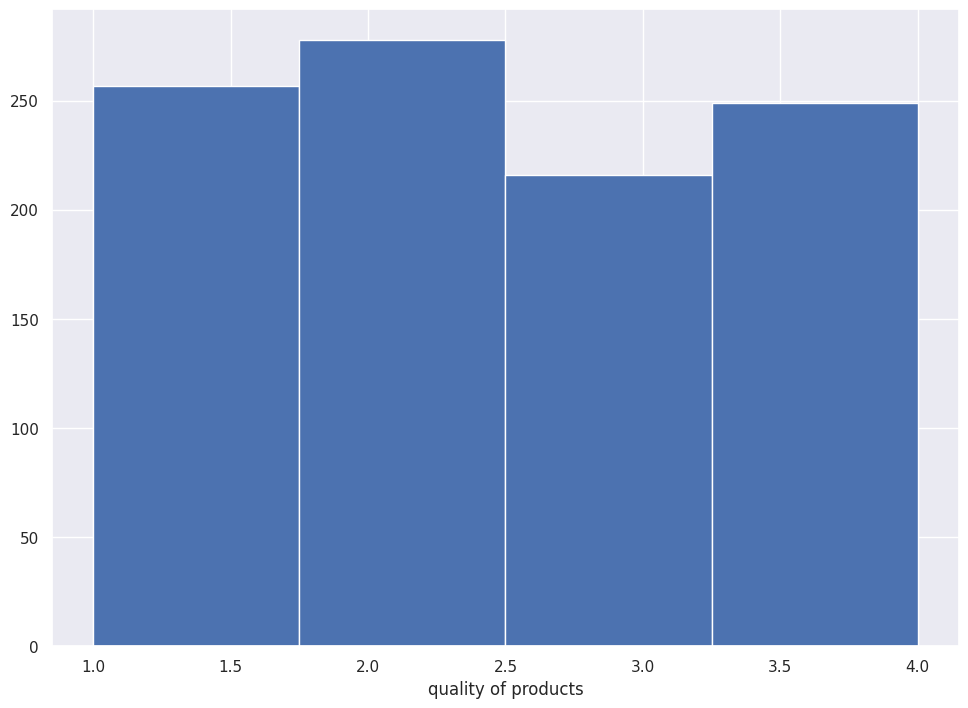

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(CW_Dataset['quality'], bins=4, rwidth =1.0)
plt.xlabel("quality of products")
plt.show()

In [ ]:
correlation_matrix = CW_Dataset.corr().round(2)

<Axes: >

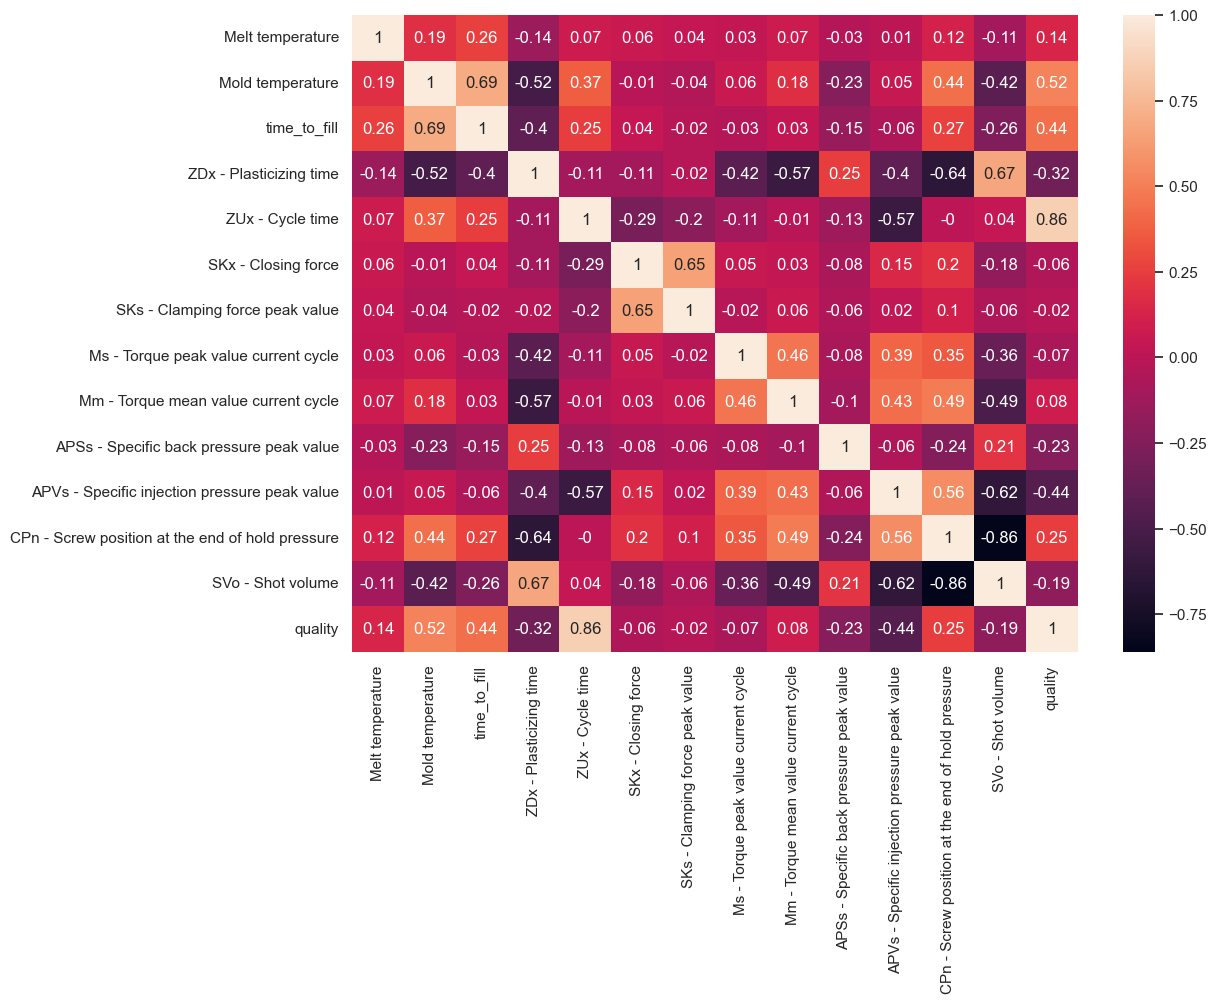

In [ ]:
sns.heatmap(data=correlation_matrix, annot=True)

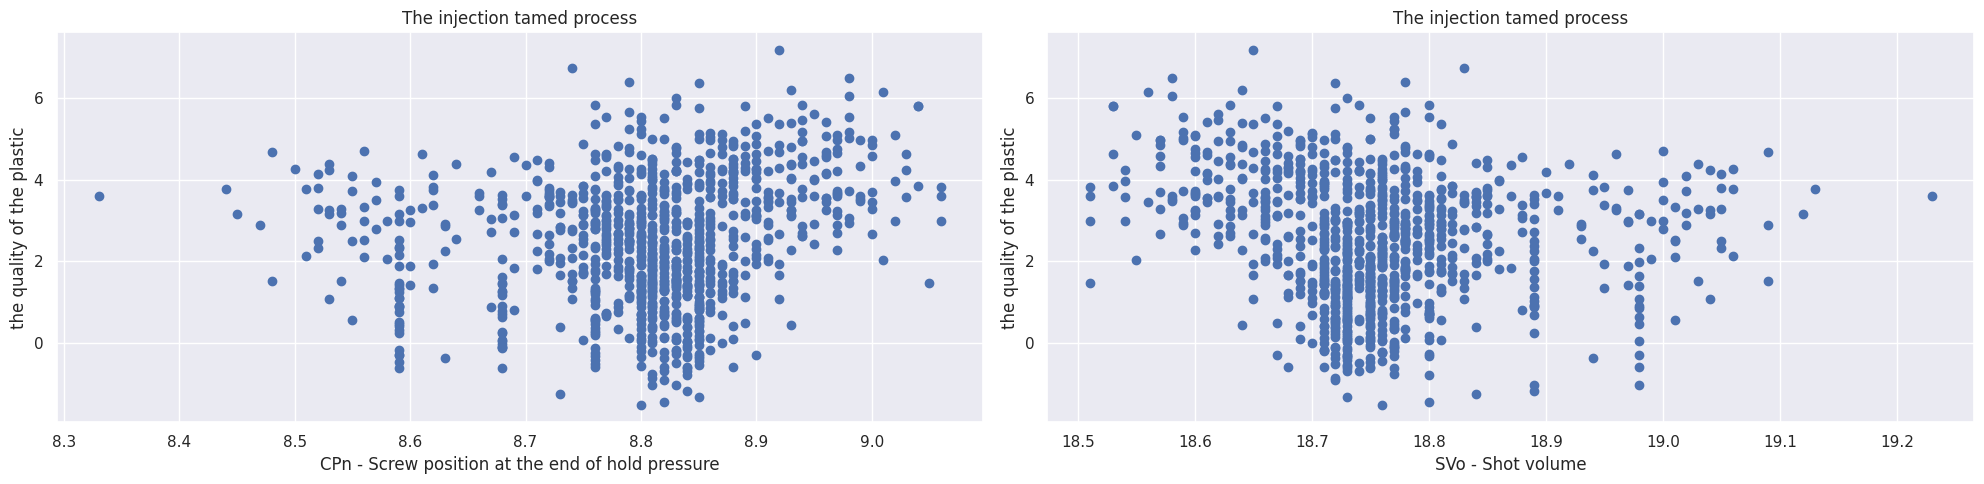

In [ ]:
jitter = np.random.normal(scale=1.0, size=len(CW_Dataset))
target_jittered = CW_Dataset['quality'] + jitter
plt.figure(figsize=(20, 5))
features = ['CPn - Screw position at the end of hold pressure', 'SVo - Shot volume']
target = CW_Dataset['quality']
for i, col in enumerate (features):
  plt.subplot(1, len(features), i+1)
  x = CW_Dataset[col]
  y = target_jittered
  plt.scatter(x, y, marker='o')
  plt.title("The injection tamed process")
  plt.xlabel(col)
  plt.ylabel("the quality of the plastic")
  plt.tight_layout()

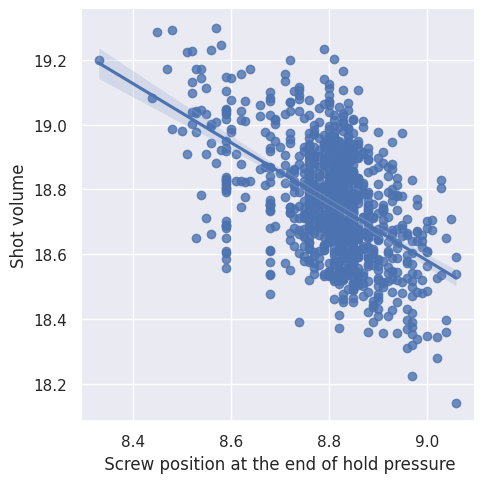

In [ ]:
CW_Dataset['Shot volume'] = CW_Dataset['Shot volume'] + np.random.normal(scale=0.1, size=len(CW_Dataset))
sns.lmplot(x	=	' Screw position at the end of hold pressure',	y	=	'Shot volume',	data	=	CW_Dataset);

In [ ]:
import scipy.stats as stats
group_1 = CW_Dataset[CW_Dataset['quality'] == 1][' Screw position at the end of hold pressure']
group_2 = CW_Dataset[CW_Dataset['quality'] == 2][' Screw position at the end of hold pressure']
group_3 = CW_Dataset[CW_Dataset['quality'] == 3][' Screw position at the end of hold pressure']
group_4 = CW_Dataset[CW_Dataset['quality'] == 4][' Screw position at the end of hold pressure']
f_stats, p_value = stats.f_oneway(group_1, group_2, group_3, group_4)
print("F-statistic:", f_stats, "P-value:", p_value)

F-statistic: 188.26161020686308 P-value: 1.0709046407439922e-96


In [ ]:
import scipy.stats as stats
group_1 = CW_Dataset[CW_Dataset['quality'] == 1]['Shot volume']
group_2 = CW_Dataset[CW_Dataset['quality'] == 2]['Shot volume']
group_3 = CW_Dataset[CW_Dataset['quality'] == 3]['Shot volume']
group_4 = CW_Dataset[CW_Dataset['quality'] == 4]['Shot volume']
f_stats, p_value = stats.f_oneway(group_1, group_2, group_3, group_4)
print("F-statistic:", f_stats, "P-value:", p_value)

F-statistic: 195.51307222052102 P-value: 1.0995725726553062e-99


In [10]:
!pip uninstall -y catboost
!pip install catboost


Found existing installation: catboost 1.2.7
Uninstalling catboost-1.2.7:
  Successfully uninstalled catboost-1.2.7
  Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl (98.7 MB)


In [6]:
!pip install scikeras

In [ ]:
#Name: Sakariya Abuukar
#Student Number: 4300437

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from catboost import CatBoostClassifier
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier




df = pd.read_csv("CW_Dataset_4300437.csv")

X = df.drop(columns=['quality'])
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

ModuleNotFoundError: No module named 'scikeras'

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf, X_train, y_train, cv=kf, scoring='accuracy')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Cross-Validation Scores:", rf_scores.mean())
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.94
Cross-Validation Scores: 0.9266666666666667
              precision    recall  f1-score   support

         1.0       0.89      0.96      0.92        68
         2.0       0.95      0.87      0.91        63
         3.0       0.98      0.95      0.96        57
         4.0       0.95      0.98      0.97        62

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



In [ ]:
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_scores = cross_val_score(et, X_train, y_train, cv=kf, scoring="accuracy")
et.fit(X_train, y_train)
et_pred = et.predict(X_test)

print("Extra Trees Accuracy:", accuracy_score(y_test, et_pred))
print("Cross-Validation Scores:", et_scores.mean())
print(classification_report(y_test, et_pred))

Extra Trees Accuracy: 0.932
Cross-Validation Scores: 0.9306666666666666
              precision    recall  f1-score   support

         1.0       0.87      0.96      0.91        68
         2.0       0.95      0.86      0.90        63
         3.0       0.98      0.93      0.95        57
         4.0       0.95      0.98      0.97        62

    accuracy                           0.93       250
   macro avg       0.94      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



In [ ]:
cat = CatBoostClassifier(iterations=200, depth=6, learning_rate=0.1,verbose=0)
cat_scores = cross_val_score(cat, X_train, y_train, cv=kf, scoring="accuracy")
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)

print("CatBoost Accuracy:", accuracy_score(y_test, cat_pred))
print("Cross-Validation Scores:", cat_scores.mean())
print(classification_report(y_test, cat_pred))


CatBoost Accuracy: 0.944
Cross-Validation Scores: 0.9293333333333335
              precision    recall  f1-score   support

         1.0       0.90      0.96      0.93        68
         2.0       0.95      0.89      0.92        63
         3.0       0.98      0.95      0.96        57
         4.0       0.95      0.98      0.97        62

    accuracy                           0.94       250
   macro avg       0.95      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



In [ ]:
nb = GaussianNB()
nb_scores = cross_val_score(nb, X_train, y_train, cv=kf, scoring="accuracy")
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))





Naive Bayes Accuracy: 0.836
Cross-Validation Scores: 0.8333333333333334
              precision    recall  f1-score   support

         1.0       0.66      0.94      0.78        68
         2.0       0.88      0.48      0.62        63
         3.0       0.98      0.95      0.96        57
         4.0       0.95      0.98      0.97        62

    accuracy                           0.84       250
   macro avg       0.87      0.84      0.83       250
weighted avg       0.86      0.84      0.83       250



In [ ]:


model = Sequential ([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(4, activation='softmax')

    ])


model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model.fit(X_train, y_train - 1, epochs=10, batch_size=16,
          validation_data = (X_test, y_test - 1), verbose=1)

loss, ann_acc = model.evaluate(X_test, y_test - 1)
print("ANN Accuracy:", ann_acc)




Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5088 - loss: 1.2338 - val_accuracy: 0.8040 - val_loss: 0.7457
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8517 - loss: 0.6689 - val_accuracy: 0.8400 - val_loss: 0.4874
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8559 - loss: 0.4911 - val_accuracy: 0.8760 - val_loss: 0.4166
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8659 - loss: 0.4180 - val_accuracy: 0.8680 - val_loss: 0.3854
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8709 - loss: 0.3767 - val_accuracy: 0.8680 - val_loss: 0.3796
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8867 - loss: 0.3322 - val_accuracy: 0.8720 - val_loss: 0.3650
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8695 - loss: 0.3677 - val_accuracy: 0.8720 - val_loss: 0.3560
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8769 - loss: 0.3145 - val_accuracy: 0.8760 - val_loss: 0.3490
Ep

In [ ]:
ann_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Fold{fold + 1}")

    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]

    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]


    model = Sequential ([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(4, activation='softmax')

    ])


    model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

    model.fit(X_train_fold, y_train_fold -1, epochs=10, batch_size=16,
          validation_data =(X_val_fold, y_val_fold -1), verbose = 0)


    ann_acc = model.evaluate(X_val_fold, y_val_fold - 1, verbose=0)[1]
    ann_scores.append(ann_acc)
    print(f"Fold accuracy: {ann_acc}")


model.fit(X_train, y_train - 1, epochs=10, batch_size=16, verbose=0)
loss, ann_acc = model.evaluate(X_test, y_test - 1, verbose=0)

Fold1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold accuracy: 0.9333333373069763
Fold2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold accuracy: 0.9066666960716248
Fold3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold accuracy: 0.8933333158493042
Fold4


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold accuracy: 0.8733333349227905
Fold5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold accuracy: 0.8199999928474426


In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


best_rf_model = grid_search.best_estimator_


best_rf_pred = best_rf_model.predict(X_test)

print("Best Random Forest Accuracy:", accuracy_score(y_test, best_rf_pred))



Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9306666666666666
Best Random Forest Accuracy: 0.936


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2 ,5 ,10],
    'min_samples_leaf': [1,2,4]
}

et = ExtraTreesClassifier(random_state=42)

grid_search = GridSearchCV(estimator=et, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train,y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_et_model = grid_search.best_estimator_

best_et_pred = best_et_model.predict(X_test)

print("Best Extra Trees Accuracy:", accuracy_score(y_test, best_et_pred))








Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9333333333333333
Best Extra Trees Accuracy: 0.928


In [ ]:
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

cat = CatBoostClassifier(verbose=0)
grid_search = GridSearchCV(estimator=cat, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_cat_model = grid_search.best_estimator_

best_cat_pred = best_cat_model.predict(X_test)

print("Best CatBoost Accuracy:", accuracy_score(y_test, best_cat_pred))

Best Hyperparameters: {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}
Best Score: 0.9333333333333333
Best CatBoost Accuracy: 0.936


In [ ]:
param_grid =  {
     'var_smoothing': [1e-9, 1e-8, 1e-7],
     'priors': [None, [0.25, 0.25, 0.25, 0.25], [0.4, 0.3, 0.2, 0.1]]
}

nb = GaussianNB()
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_nb_model = grid_search.best_estimator_

best_nb_pred = best_nb_model.predict(X_test)

print("Best Naive Bayes Accuracy:", accuracy_score(y_test, best_nb_pred))

Best Hyperparameters: {'priors': None, 'var_smoothing': 1e-09}
Best Score: 0.8400000000000001
Best Naive Bayes Accuracy: 0.836


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = mlp = MLPClassifier(max_iter=3000, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive']
}

grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_ann_model = grid_search.best_estimator_

best_ann_pred = best_ann_model.predict(X_test)

print("Best ANN Accuracy:", accuracy_score(y_test, best_ann_pred))





Best Hyperparameters: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
Best Score: 0.9146666666666666
Best ANN Accuracy: 0.924


In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

def evalute_model(model, X_train, y_test, y_pred):
   accuracy = accuracy_score(y_test, y_pred)
   precision = precision_score(y_test, y_pred, average=None)
   recall = recall_score(y_test, y_pred, average=None)
   f1 = f1_score(y_test, y_pred, average=None)

   y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
   y_pred_prob = model.predict_proba(X_test)

   roc_auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')

   print(f"Accuracy: {accuracy:.2f}")
   print(f"\nPrecision: {precision}")
   print(f"\nRecall: {recall}")
   print(f"\nF1 Score: {f1}")
   print(f"\nROC AUC: {roc_auc:.2f}")

   print("\nClassification Report:")
   print(classification_report(y_test, y_pred))

   print("\nConfusion Matrix:")
   print(classification_report(y_test, y_pred))

   print("\nConfusion Matrix:")
   cm = confusion_matrix(y_test, y_test)
   sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
   plt.xlabel("Predicted")
   plt.ylabel("quality")
   plt.show()










Accuracy: 0.94

Precision: [0.89041096 0.94827586 0.98181818 0.953125  ]

Recall: [0.95588235 0.87301587 0.94736842 0.98387097]

F1 Score: [0.92198582 0.90909091 0.96428571 0.96825397]

ROC AUC: 0.99

Classification Report:
              precision    recall  f1-score   support

         1.0       0.89      0.96      0.92        68
         2.0       0.95      0.87      0.91        63
         3.0       0.98      0.95      0.96        57
         4.0       0.95      0.98      0.97        62

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250


Confusion Matrix:
              precision    recall  f1-score   support

         1.0       0.89      0.96      0.92        68
         2.0       0.95      0.87      0.91        63
         3.0       0.98      0.95      0.96        57
         4.0       0.95      0.98      0.97        62

    accuracy                           0.94       

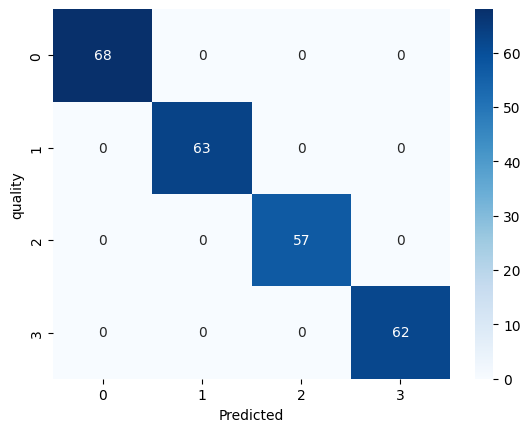

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

evalute_model(rf_model, X_train, y_test, y_pred_rf)

Accuracy: 0.93

Precision: [0.86666667 0.94736842 0.98148148 0.953125  ]

Recall: [0.95588235 0.85714286 0.92982456 0.98387097]

F1 Score: [0.90909091 0.9        0.95495495 0.96825397]

ROC AUC: 0.99

Classification Report:
              precision    recall  f1-score   support

         1.0       0.87      0.96      0.91        68
         2.0       0.95      0.86      0.90        63
         3.0       0.98      0.93      0.95        57
         4.0       0.95      0.98      0.97        62

    accuracy                           0.93       250
   macro avg       0.94      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250


Confusion Matrix:
              precision    recall  f1-score   support

         1.0       0.87      0.96      0.91        68
         2.0       0.95      0.86      0.90        63
         3.0       0.98      0.93      0.95        57
         4.0       0.95      0.98      0.97        62

    accuracy                           0.93       

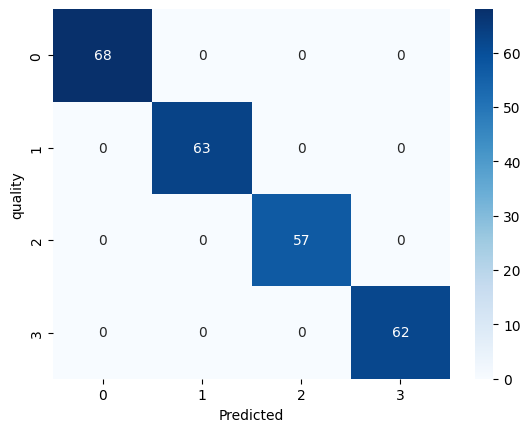

In [ ]:
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)
y_pred_et = et_model.predict(X_test)

evalute_model(et_model, X_train, y_test, y_pred_et)

Learning rate set to 0.077974
0:	learn: 1.2571268	total: 11.8ms	remaining: 11.8s
1:	learn: 1.1567635	total: 27.1ms	remaining: 13.5s
2:	learn: 1.0654260	total: 39.5ms	remaining: 13.1s
3:	learn: 0.9936067	total: 56.7ms	remaining: 14.1s
4:	learn: 0.9265959	total: 72.6ms	remaining: 14.5s
5:	learn: 0.8746219	total: 86.8ms	remaining: 14.4s
6:	learn: 0.8277947	total: 95.4ms	remaining: 13.5s
7:	learn: 0.7834844	total: 108ms	remaining: 13.4s
8:	learn: 0.7398936	total: 120ms	remaining: 13.3s
9:	learn: 0.7009055	total: 130ms	remaining: 12.8s
10:	learn: 0.6679260	total: 144ms	remaining: 13s
11:	learn: 0.6361193	total: 157ms	remaining: 12.9s
12:	learn: 0.6107780	total: 171ms	remaining: 13s
13:	learn: 0.5867825	total: 181ms	remaining: 12.7s
14:	learn: 0.5647922	total: 189ms	remaining: 12.4s
15:	learn: 0.5453955	total: 203ms	remaining: 12.5s
16:	learn: 0.5238658	total: 220ms	remaining: 12.7s
17:	learn: 0.5062523	total: 230ms	remaining: 12.5s
18:	learn: 0.4902557	total: 242ms	remaining: 12.5s
19:	lear

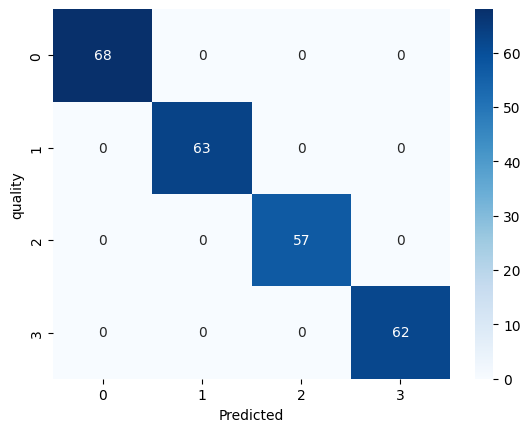

In [ ]:
catboost_model = CatBoostClassifier(random_state=42)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)

evalute_model(catboost_model, X_train, y_test, y_pred_catboost)

Accuracy: 0.84

Precision: [0.65979381 0.88235294 0.98181818 0.953125  ]

Recall: [0.94117647 0.47619048 0.94736842 0.98387097]

F1 Score: [0.77575758 0.6185567  0.96428571 0.96825397]

ROC AUC: 0.98

Classification Report:
              precision    recall  f1-score   support

         1.0       0.66      0.94      0.78        68
         2.0       0.88      0.48      0.62        63
         3.0       0.98      0.95      0.96        57
         4.0       0.95      0.98      0.97        62

    accuracy                           0.84       250
   macro avg       0.87      0.84      0.83       250
weighted avg       0.86      0.84      0.83       250


Confusion Matrix:
              precision    recall  f1-score   support

         1.0       0.66      0.94      0.78        68
         2.0       0.88      0.48      0.62        63
         3.0       0.98      0.95      0.96        57
         4.0       0.95      0.98      0.97        62

    accuracy                           0.84       

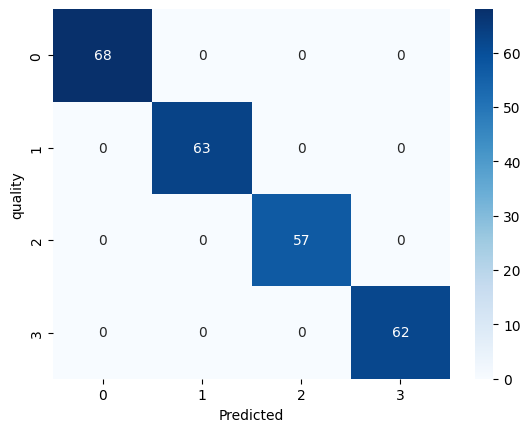

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
evalute_model(nb_model, X_train, y_test, y_pred_nb)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3352 - loss: 1.4657
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7652 - loss: 0.9706  
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8443 - loss: 0.7136 
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8897 - loss: 0.4750 
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8806 - loss: 0.4556 
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8785 - loss: 0.4092 
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8796 - loss: 0.3862 
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8858 - loss: 0.3362 
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8689 - loss: 0.3698 
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8817 - loss: 0.3423
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8887 - loss: 0.3042 
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8815 - los

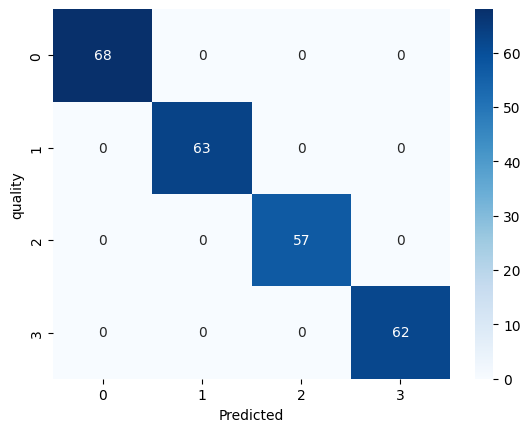

In [ ]:
import tensorflow as tf

def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

ann_model = KerasClassifier(model=create_model, epochs=50, batch_size=32, verbose=1)
ann_model.fit(X_train, y_train)
y_pred_ann = ann_model.predict(X_test)

evalute_model(ann_model, X_train, y_test, y_pred_ann)

<Figure size 640x480 with 0 Axes>

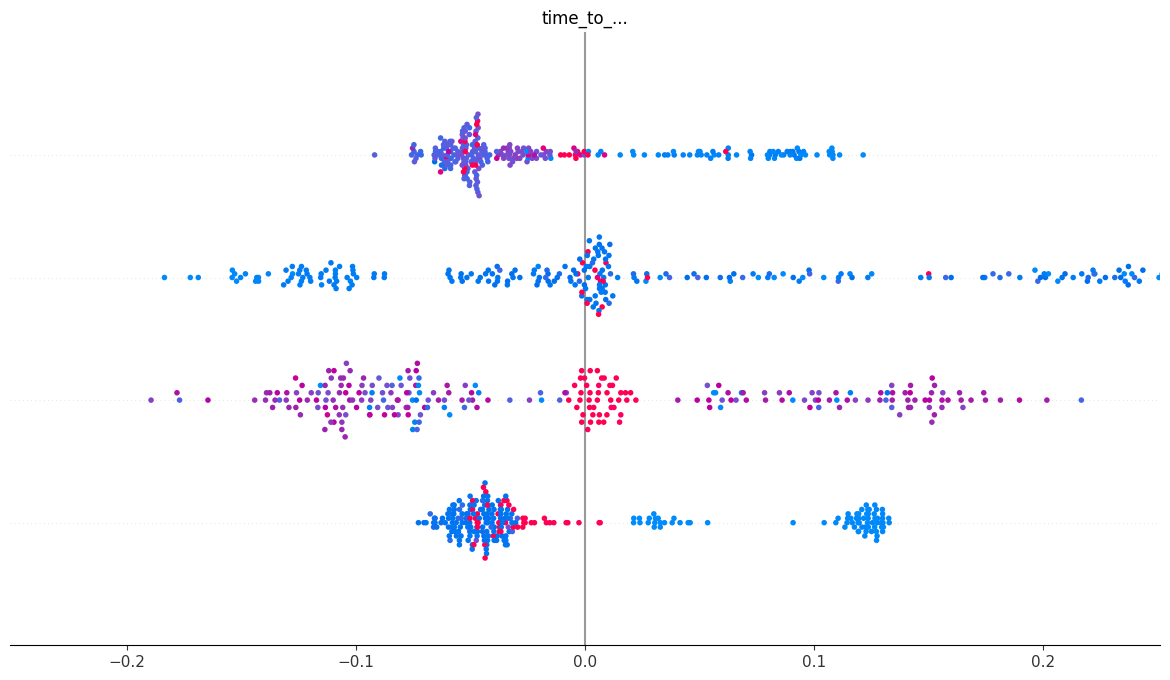

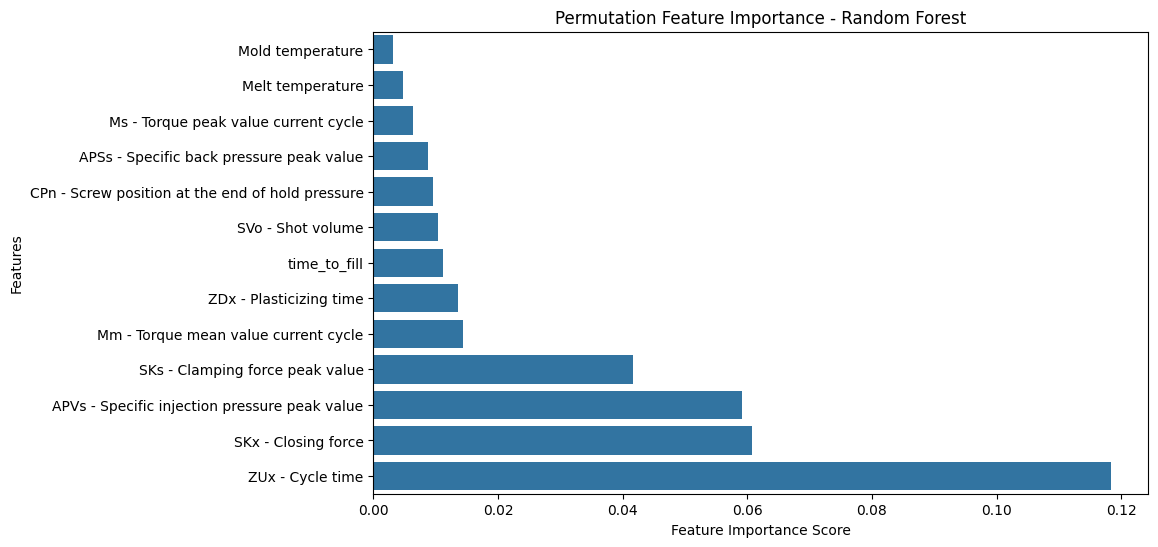

<Figure size 640x480 with 0 Axes>

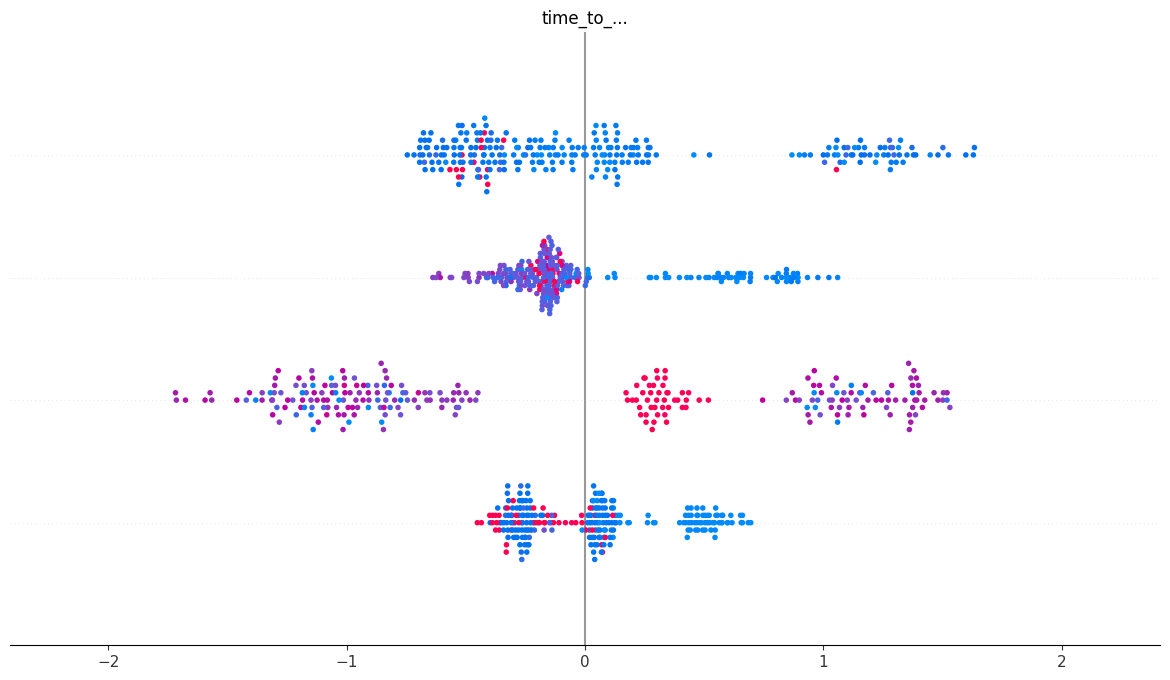

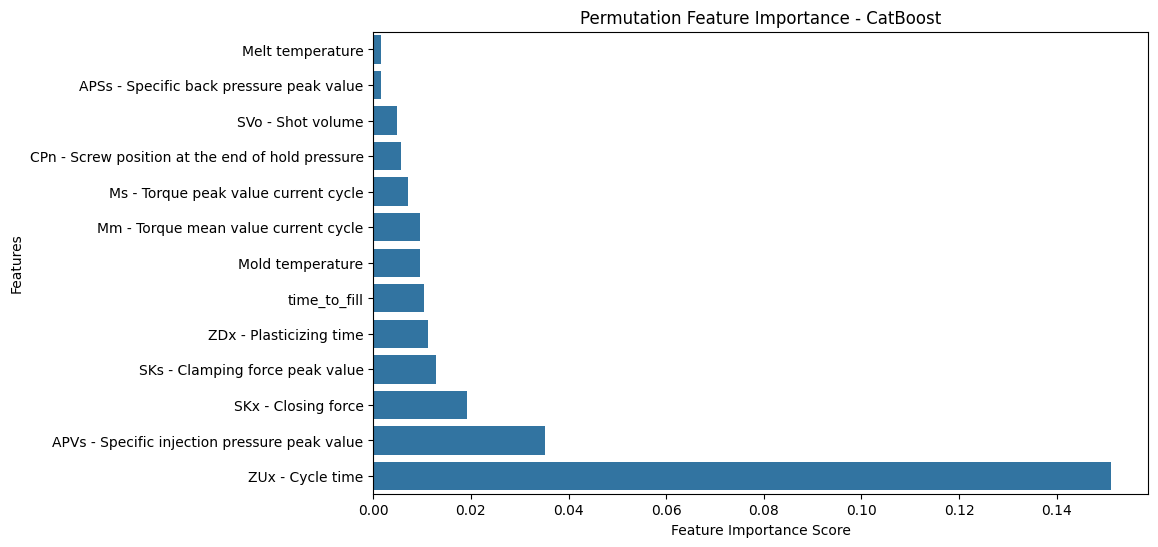

<ipython-input-6-74649352e741>:30: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, title=f"SHAP Feature Importance - {model_name}")
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:726: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:746: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.11/dis

<Figure size 640x480 with 0 Axes>

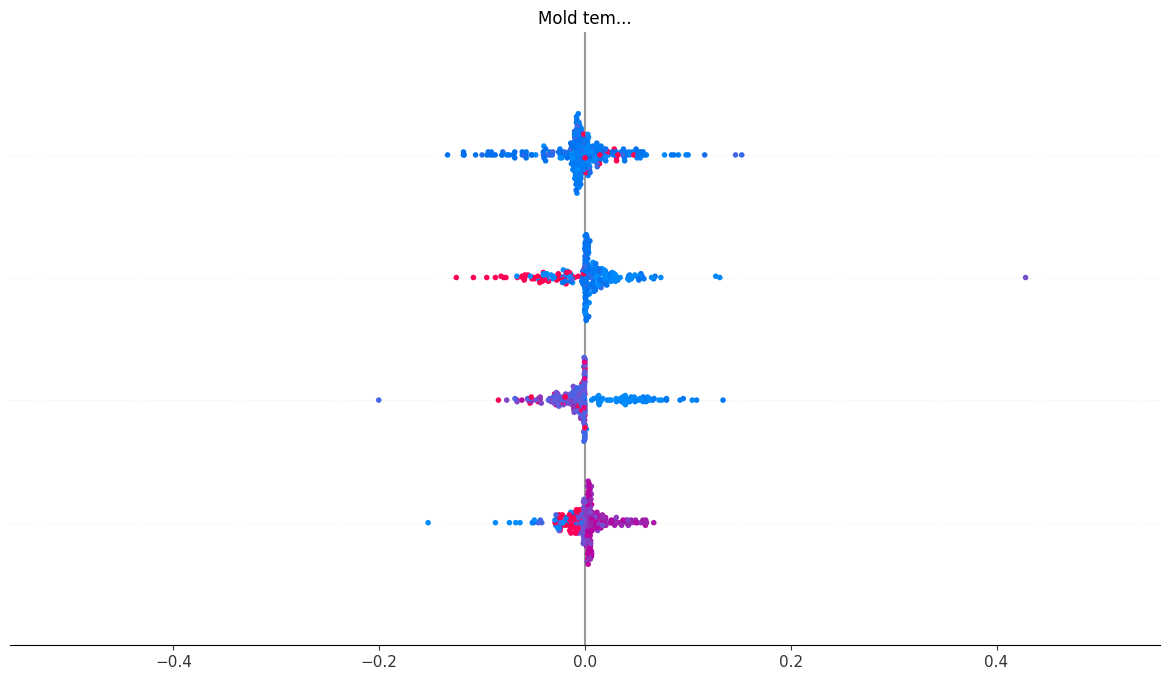

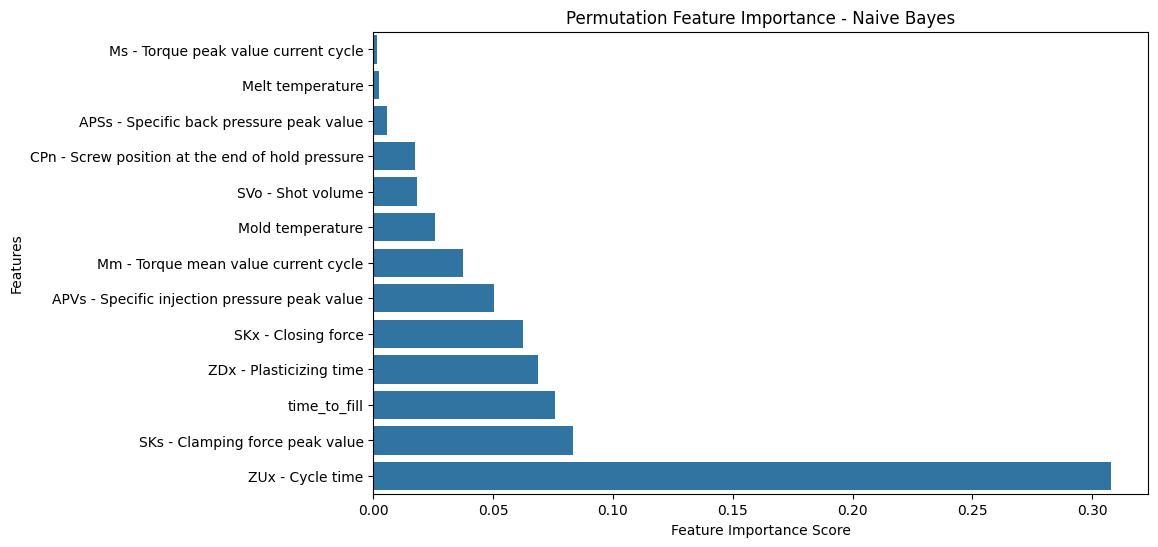

In [ ]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv("CW_Dataset_4300437.csv")  # Replace with your actual file path
X = df.drop(columns=['quality'])
y = df["quality"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

catboost_model = CatBoostClassifier(random_state=42, verbose=0)  # Set verbose=0 to suppress training output
catboost_model.fit(X_train, y_train)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


def analyze_feature_importance(model, model_name):

    explainer = shap.Explainer(model.predict_proba, X_test) if isinstance(model, GaussianNB) else shap.Explainer(model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, title=f"SHAP Feature Importance - {model_name}")

    # Permutation Importance
    perm_importance = permutation_importance(model, X_test, y_test, scoring='accuracy')
    sorted_idx = perm_importance.importances_mean.argsort()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=perm_importance.importances_mean[sorted_idx], y=X_test.columns[sorted_idx])
    plt.xlabel("Feature Importance Score")
    plt.ylabel("Features")
    plt.title(f"Permutation Feature Importance - {model_name}")
    plt.show()


analyze_feature_importance(rf_model, "Random Forest")
analyze_feature_importance(catboost_model, "CatBoost")
analyze_feature_importance(nb_model, "Naive Bayes")


In [2]:
!pip install dash
!pip install dash-bootstrap-components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.4/202.4 kB 3.8 MB/s eta 0:00:00


In [1]:
!pip install dash-table

In [7]:


from dash import Dash, html, dcc
import dash_bootstrap_components as dbc
import pandas as pd
import numpy as np
import plotly.express as px
from dash.dependencies import Input, Output
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import dash_table
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("CW_Dataset_4300437.csv")
df = df.drop(df.columns[0], axis=1)
df.rename(columns={'CPn - Screw position at the end of hold pressure': 'Screw position at the end of hold pressure',
                    'SVo - Shot volume': 'Shot volume'}, inplace=True)
df['Moulding_injection_volume'] = df['Screw position at the end of hold pressure'] * df['Shot volume']
df['Moulding_injection_process'] = pd.cut(df['Screw position at the end of hold pressure'],
                                          bins=[8.6, 8.7, 8.8, 8.9],
                                          labels=['low', 'medium', 'High'])
scaler = StandardScaler()
df[['Screw position at the end of hold pressure', 'Shot volume']] = scaler.fit_transform(
    df[['Screw position at the end of hold pressure', 'Shot volume']])

df['feature_catergory'] = pd.cut(df['Screw position at the end of hold pressure'], bins=3, labels=['low', 'medium', 'high'])

if 'quality' not in df.columns:
    df['quality'] = np.random.choice(['Good', 'Bad'], size=len(df))

label_encoder = LabelEncoder()
df['quality_encoded'] = label_encoder.fit_transform(df['quality'])

app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app_layout = dbc.Container([
    html.H1("Injection Moudling Quality Dashboard", className='mb-4'),

    dbc.Row([
        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Feature Selection"),
                dbc.CardBody([
                    dcc.Dropdown(
                        id='feature-dropdown',
                        options=[{'label': col, 'value': col} for col in
                                 ['Screw position at the end of hold pressure', 'Shot volume']],
                        value='Screw position at the end of hold pressure'
                    ),
                    dcc.Graph(id='histogram-plot'),
                    dcc.Graph(id='scatter-plot'),
                    dcc.Graph(id='bar-chart')
                ])
            ])
        ], width=6),

        dbc.Col([
            dbc.Card([
                dbc.CardHeader("Quality Distribution"),
                dbc.CardBody([
                    dcc.Graph(id='quality-distribution-chart')
                ])
            ])
        ], width=6)
    ]),

    html.Hr(),

    dbc.Row([
        dbc.Col([
            html.H3("Dataset Overview"),
            dash_table.DataTable(
                id='data-table',
                columns=[{"name": col, "id": col} for col in df.columns],
                data=df.to_dict('records'),
                page_size=10,
                style_table={'overflowX': 'auto'},
                filter_action='native',
                sort_action='native',
                row_selectable='multi',
                selected_rows=[]
            )
        ], width=12)
    ])
])

app.layout = app_layout

@app.callback(
    Output('histogram-plot', 'figure'),
    [Input('feature-dropdown', 'value')]
)
def update_histogram_plot(selected_feature):
    fig = px.histogram(df, x=selected_feature, color='quality', title=f"{selected_feature} Distribution")
    return fig


@app.callback(
    Output('quality-distribution-chart', 'figure'),
    [Input('feature-dropdown', 'value')]
)
def update_quality_distribution(selected_feature):
    fig = px.histogram(df, x='quality', color=selected_feature,
                       title=f"Quality Distribution by {selected_feature}")
    return fig


@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('feature-dropdown', 'value')]
)
def update_scatter_plot(selected_feature):
    fig = px.scatter(df, x=selected_feature, y='Moulding_injection_volume', color='quality',
                     title=f"{selected_feature} vs Moulding Injection Volume")
    return fig

@app.callback(
    Output('bar-chart', 'figure'),
    [Input('feature-dropdown', 'value')]
)
def update_accuracy_bar_chart(selected_feature):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score

    X = df[['Screw position at the end of hold pressure', 'Shot volume']]
    y = df['quality_encoded']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    fig = px.bar(
        x=['Accuracy'],
        y=[accuracy],
        labels={'x': 'Metric', 'y': 'Value'},
        title="Model Accuracy"
    )
    return fig




if __name__ == '__main__':
    app.run(debug=True)


<ipython-input-7-5f00aca7dfef>:9: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import dash_table


<IPython.core.display.Javascript object>